In [3]:
from lib import draw_examples, make_test, run_test, TensorType as TT
from tinygrad import Tensor
import numpy as np

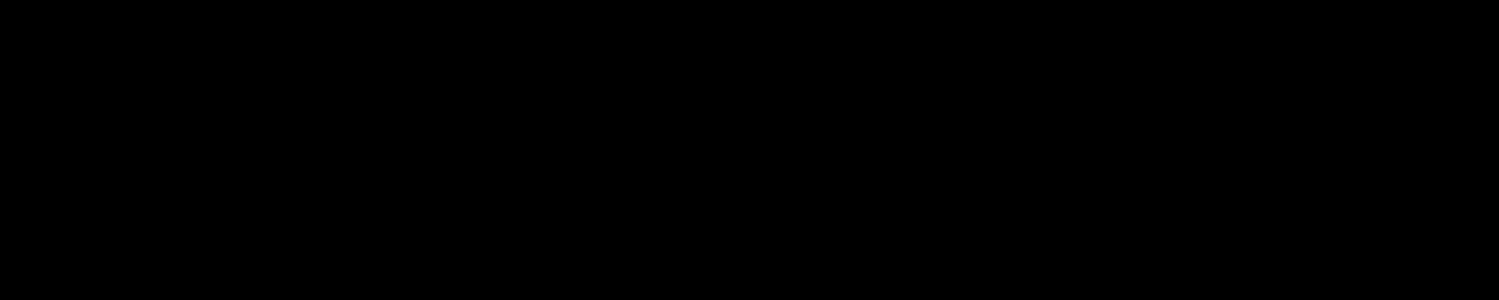

In [2]:
def arange(i: int):
    "Use this function to replace a for-loop."
    return Tensor(list(range(i)))

draw_examples("arange", [{"" : arange(i)} for i in [5, 3, 9]])

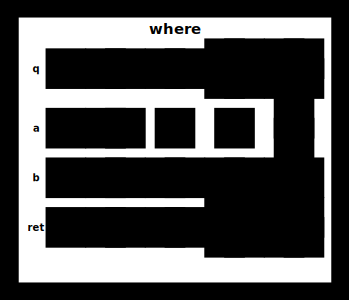

In [3]:
def where(q, a, b):
    "Use this function to replace an if-statement."
    return q * a + q.logical_not() * b

# In diagrams, orange is positive/True, white is zero/False, and blue is negative.

examples = [(Tensor([False]), Tensor([10]), Tensor([0])),
            (Tensor([False, True]), Tensor([1, 1]), Tensor([-10, 0])),
            (Tensor([False, True]), Tensor([1]), Tensor([-10, 0])),
            (Tensor([[False, True], [True, False]]), Tensor([1]), Tensor([-10, 0])),
            (Tensor([[False, True], [True, False]]), Tensor([[0], [10]]), Tensor([-10, 0])),
           ]
draw_examples("where", [{"q": q, "a":a, "b":b, "ret": where(q, a, b)} for q, a, b in examples])

## Puzzle 1 - ones

Compute [ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html) - the vector of all ones.

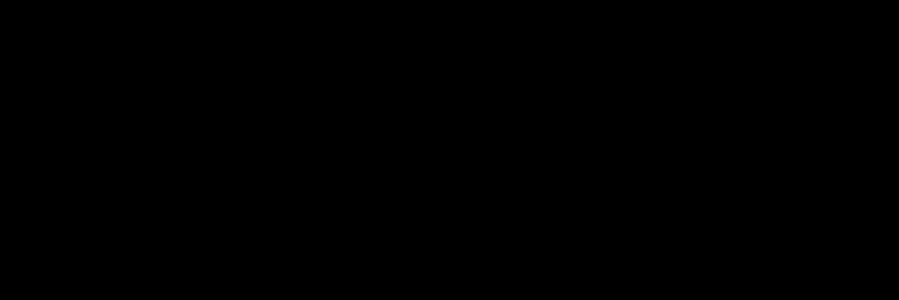

In [4]:
def ones_spec(out):
    for i in range(len(out)):
        out[i] = 1
        
def ones(i: int) -> TT[["i",]]:
    return where(arange(i) >= 0, 1, 0)

test_ones = make_test("one", ones, ones_spec, add_sizes=["i"])

In [5]:
run_test(test_ones)

Correct!


## Puzzle 2 - sum

Compute [sum](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) - the sum of a vector.

/tmp/ipykernel_81307/2279909396.py:4: RuntimeWarning: overflow encountered in scalar add
  out[0] += a[i]


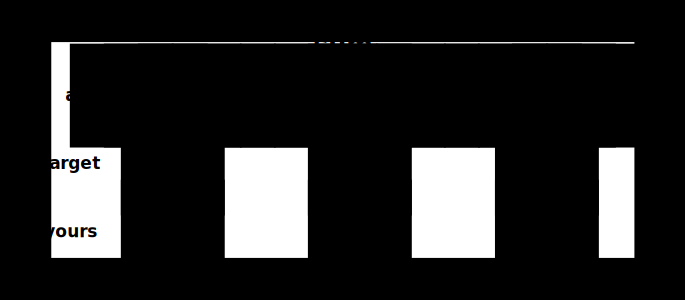

In [6]:
def sum_spec(a, out):
    out[0] = 0
    for i in range(len(a)):
        out[0] += a[i]
        
def sum(a: TT[["i"]]) -> TT[[1]]:
    return a @ ones(a.shape[0])[:, None]


test_sum = make_test("sum", sum, sum_spec)

In [7]:
run_test(test_sum)

/tmp/ipykernel_81307/2279909396.py:4: RuntimeWarning: overflow encountered in scalar add
  out[0] += a[i]


Correct!


## Puzzle 3 - outer

Compute [outer](https://numpy.org/doc/stable/reference/generated/numpy.outer.html) - the outer product of two vectors.

/tmp/ipykernel_81307/2081148925.py:4: RuntimeWarning: overflow encountered in scalar multiply
  out[i][j] = a[i] * b[j]


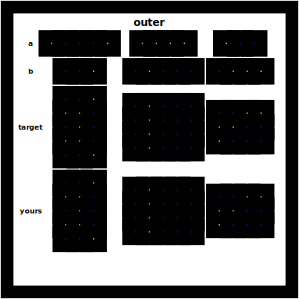

In [8]:
def outer_spec(a, b, out):
    for i in range(len(out)):
        for j in range(len(out[0])):
            out[i][j] = a[i] * b[j]
            
def outer(a: TT[["i"]], b: TT[["j"]]) -> TT[["i", "j"]]:
    return a[:, None] @ b[None, :]
    
test_outer = make_test("outer", outer, outer_spec)

In [9]:
run_test(test_outer)

/tmp/ipykernel_81307/2081148925.py:4: RuntimeWarning: overflow encountered in scalar multiply
  out[i][j] = a[i] * b[j]
/tmp/ipykernel_81307/2081148925.py:4: RuntimeWarning: overflow encountered in scalar multiply
  out[i][j] = a[i] * b[j]
/tmp/ipykernel_81307/2081148925.py:4: RuntimeWarning: overflow encountered in scalar multiply
  out[i][j] = a[i] * b[j]
/tmp/ipykernel_81307/2081148925.py:4: RuntimeWarning: overflow encountered in scalar multiply
  out[i][j] = a[i] * b[j]
/tmp/ipykernel_81307/2081148925.py:4: RuntimeWarning: overflow encountered in scalar multiply
  out[i][j] = a[i] * b[j]
/tmp/ipykernel_81307/2081148925.py:4: RuntimeWarning: overflow encountered in scalar multiply
  out[i][j] = a[i] * b[j]


Correct!


## Puzzle 4 - diag

Compute [diag](https://numpy.org/doc/stable/reference/generated/numpy.diag.html) - the diagonal vector of a square matrix.

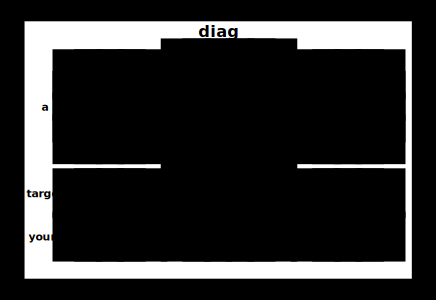

In [10]:
def diag_spec(a, out):
    for i in range(len(a)):
        out[i] = a[i][i]
        
def diag(a: TT[["i", "i"]]) -> TT[["i"]]:
    i = a.shape[0]
    return a[arange(i), arange(i)]


test_diag = make_test("diag", diag, diag_spec)

In [11]:
run_test(test_diag)

Correct!


## Puzzle 5 - eye

Compute [eye](https://numpy.org/doc/stable/reference/generated/numpy.eye.html) - the identity matrix.

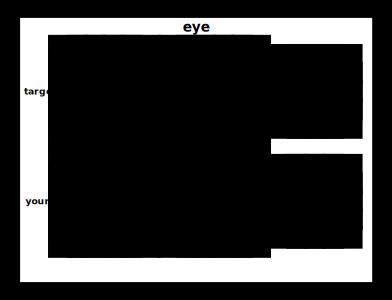

In [12]:
def eye_spec(out):
    for i in range(len(out)):
        out[i][i] = 1
        
def eye(j: int) -> TT[["j", "j"]]:
    return 1 * (arange(j) == arange(j)[:, None])
    
test_eye = make_test("eye", eye, eye_spec, add_sizes=["j"])

In [13]:
run_test(test_eye)

Correct!


## Puzzle 6 - triu

Compute [triu](https://numpy.org/doc/stable/reference/generated/numpy.triu.html) - the upper triangular matrix.

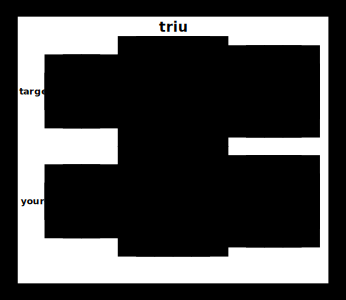

In [14]:
def triu_spec(out):
    for i in range(len(out)):
        for j in range(len(out)):
            if i <= j:
                out[i][j] = 1
            else:
                out[i][j] = 0
                
def triu(j: int) -> TT[["j", "j"]]:
    return 1 * (arange(j) >= arange(j)[:, None])


test_triu = make_test("triu", triu, triu_spec, add_sizes=["j"])

In [15]:
run_test(test_triu)

Correct!


## Puzzle 7 - cumsum

Compute [cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) - the cumulative sum.

/tmp/ipykernel_81307/1415793001.py:4: RuntimeWarning: overflow encountered in scalar add
  out[i] = total + a[i]
/tmp/ipykernel_81307/1415793001.py:5: RuntimeWarning: overflow encountered in scalar add
  total += a[i]


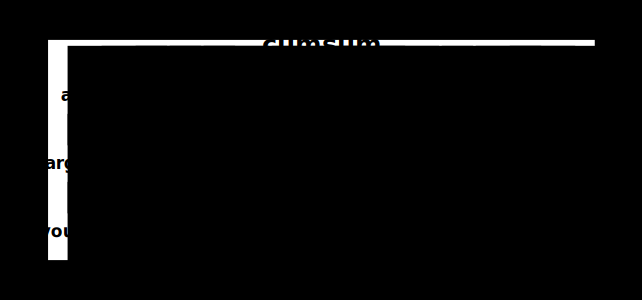

In [16]:
def cumsum_spec(a, out):
    total = 0
    for i in range(len(out)):
        out[i] = total + a[i]
        total += a[i]

def cumsum(a: TT[["i"]]) -> TT[["i"]]:
    i = a.shape[0]
    return (1 * (arange(i) <= arange(i)[:, None])) @ a

test_cumsum = make_test("cumsum", cumsum, cumsum_spec)

In [17]:
run_test(test_cumsum)

/tmp/ipykernel_81307/1415793001.py:4: RuntimeWarning: overflow encountered in scalar add
  out[i] = total + a[i]
/tmp/ipykernel_81307/1415793001.py:5: RuntimeWarning: overflow encountered in scalar add
  total += a[i]


Correct!


## Puzzle 8 - diff

Compute [diff](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) - the running difference.

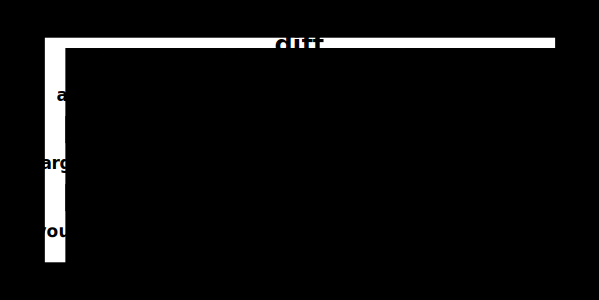

In [18]:
def diff_spec(a, out):
    out[0] = a[0]
    for i in range(1, len(out)):
        out[i] = a[i] - a[i - 1]

def diff(a: TT[["i"]], i: int) -> TT[["i"]]:
    return a - (a @ (1 * (arange(i) == arange(i)[:, None] + 1)))

test_diff = make_test("diff", diff, diff_spec, add_sizes=["i"])

In [19]:
run_test(test_diff)

/tmp/ipykernel_81307/3663207756.py:4: RuntimeWarning: overflow encountered in scalar subtract
  out[i] = a[i] - a[i - 1]


Correct!


## Puzzle 9 - vstack

Compute [vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) - the matrix of two vectors

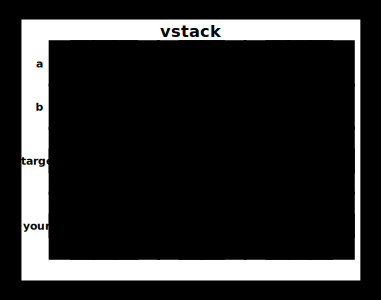

In [20]:
def vstack_spec(a, b, out):
    for i in range(len(out[0])):
        out[0][i] = a[i]
        out[1][i] = b[i]

def vstack(a: TT[["i"]], b: TT[["i"]]) -> TT[[2, "i"]]:
    return where(arange(2)[:, None] == 0, a, b)


test_vstack = make_test("vstack", vstack, vstack_spec)

In [21]:
run_test(test_vstack)

Correct!


## Puzzle 10 - roll

Compute [roll](https://numpy.org/doc/stable/reference/generated/numpy.roll.html) - the vector shifted 1 circular position.

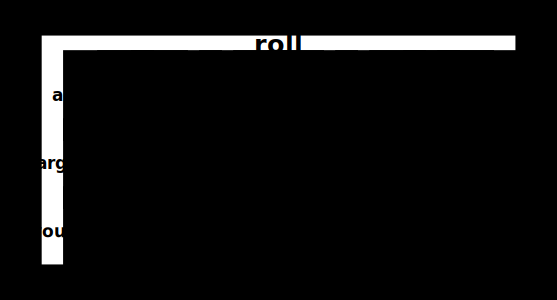

In [22]:
def roll_spec(a, out):
    for i in range(len(out)):
        if i + 1 < len(out):
            out[i] = a[i + 1]
        else:
            out[i] = a[i + 1 - len(out)]

from tinygrad import dtypes

def floor_div(t: Tensor, x: int):
        return (t / x).cast(dtypes.int)

def mod(t: Tensor, x: int):
    return t - floor_div(t, x) * x
            
def roll(a: TT[["i"]], i: int) -> TT[["i"]]:
    return a[mod((arange(i) + 1), i)]


test_roll = make_test("roll", roll, roll_spec, add_sizes=["i"])

In [23]:
run_test(test_roll)

Correct!


## Puzzle 11 - flip

Compute [flip](https://numpy.org/doc/stable/reference/generated/numpy.flip.html) - the reversed vector

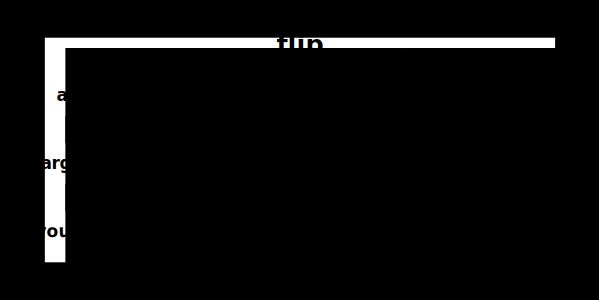

In [24]:
def flip_spec(a, out):
    for i in range(len(out)):
        out[i] = a[len(out) - i - 1]
        
def flip(a: TT[["i"]], i: int) -> TT[["i"]]:
    return a[i - arange(i) - 1]


test_flip = make_test("flip", flip, flip_spec, add_sizes=["i"])

In [25]:
run_test(test_flip)

Correct!


## Puzzle 12 - compress


Compute [compress](https://numpy.org/doc/stable/reference/generated/numpy.compress.html) - keep only masked entries (left-aligned).

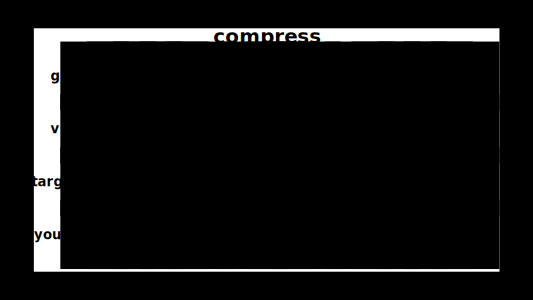

In [26]:
def compress_spec(g, v, out):
    j = 0
    for i in range(len(g)):
        if g[i]:
            out[j] = v[i]
            j += 1
            
# what about bool?
def compress(g: TT[["i"], dtypes.bool], v: TT[["i"]], i:int) -> TT[["i"]]:
    return (g * cumsum(1 * g) == (arange(i) + 1)[:, None]) @ v


test_compress = make_test("compress", compress, compress_spec, add_sizes=["i"])

In [27]:
run_test(test_compress)

AssertionError: Two tensors are not equal
 Spec: 
	<Tensor <LB CLANG (2,) float (<LoadOps.COPY: 3>, <buf real:True device:CLANG size:2 dtype:dtypes.float offset:0>)> on CLANG with grad None> 
	<Tensor <LB CLANG (2,) int ShapeTracker(views=(View(shape=(2,), strides=(1,), offset=0, mask=None, contiguous=True),))> on CLANG with grad None>

## Puzzle 13 - pad_to


Compute pad_to - eliminate or add 0s to change size of vector.

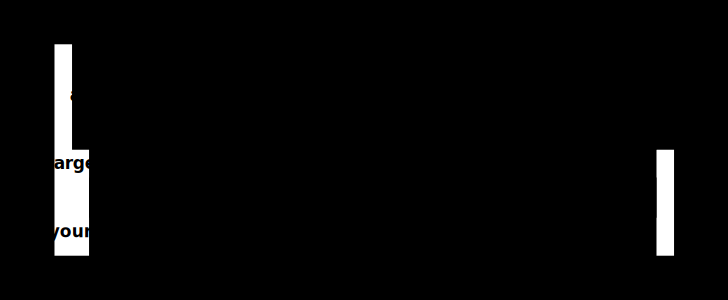

In [28]:
def pad_to_spec(a, out):
    for i in range(min(len(out), len(a))):
        out[i] = a[i]


def pad_to(a: TT[["i"]], i: int, j: int) -> TT[["j"]]:
    return where(arange(i) == arange(j)[:, None], 1, 0) @ a


test_pad_to = make_test("pad_to", pad_to, pad_to_spec, add_sizes=["i", "j"])

In [29]:
run_test(test_pad_to)

Correct!


## Puzzle 14 - sequence_mask


Compute [sequence_mask](https://www.tensorflow.org/api_docs/python/tf/sequence_mask) - pad out to length per batch.

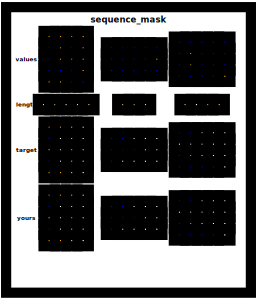

In [30]:
def sequence_mask_spec(values, length, out):
    for i in range(len(out)):
        for j in range(len(out[0])):
            if j < length[i]:
                out[i][j] = values[i][j]
            else:
                out[i][j] = 0
    
def sequence_mask(values: TT[["i", "j"]], length: TT[["i"], dtypes.int]) -> TT[["i", "j"]]:
    return (arange(values.shape[1]) < length[:, None]) * values


def constraint_set_length(d):
    d["length"] = d["length"] % d["values"].shape[1]
    return d


test_sequence = make_test("sequence_mask",
    sequence_mask, sequence_mask_spec, constraint=constraint_set_length
)

In [31]:
run_test(test_sequence)

Correct!


## Puzzle 15 - bincount

Compute [bincount](https://numpy.org/doc/stable/reference/generated/numpy.bincount.html) - count number of times an entry was seen.

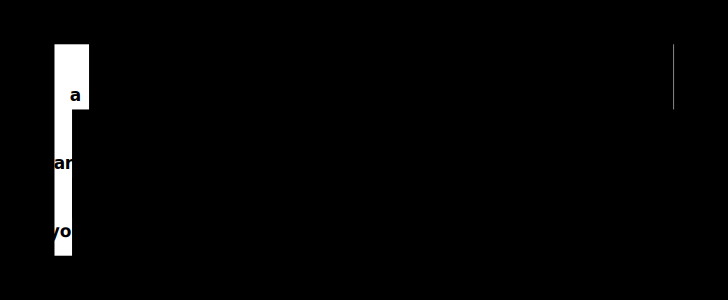

In [32]:
def bincount_spec(a, out):
    for i in range(len(a)):
        out[a[i]] += 1
        
def bincount(a: TT[["i"]], j: int) -> TT[["j"]]:
    return (1 * (a == arange(j)[:, None])) @ ones(a.shape[0])


def constraint_set_max(d):
    d["a"] = d["a"] % d["return"].shape[0]
    return d


test_bincount = make_test("bincount",
    bincount, bincount_spec, add_sizes=["j"], constraint=constraint_set_max
)

In [33]:
run_test(test_bincount)

Correct!


## Puzzle 16 - scatter_add

Compute [scatter_add](https://pytorch-scatter.readthedocs.io/en/1.3.0/functions/add.html) - add together values that link to the same location.

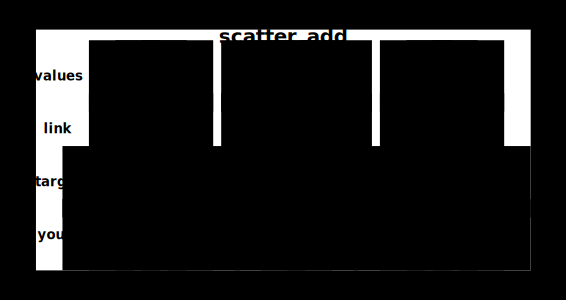

In [34]:
def scatter_add_spec(values, link, out):
    for j in range(len(values)):
        out[link[j]] += values[j]
        
def scatter_add(values: TT[["i"]], link: TT[["i"]], j: int) -> TT[["j"]]:
    return (1 * (link == arange(j)[:, None])) @ values


def constraint_set_max(d):
    d["link"] = d["link"] % d["return"].shape[0]
    return d


test_scatter_add = make_test("scatter_add",
    scatter_add, scatter_add_spec, add_sizes=["j"], constraint=constraint_set_max
)

In [35]:
run_test(test_scatter_add)

/tmp/ipykernel_81307/1679149788.py:3: RuntimeWarning: overflow encountered in scalar add
  out[link[j]] += values[j]
/tmp/ipykernel_81307/1679149788.py:3: RuntimeWarning: overflow encountered in scalar add
  out[link[j]] += values[j]


Correct!


## Puzzle 17 - flatten

Compute [flatten](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html)

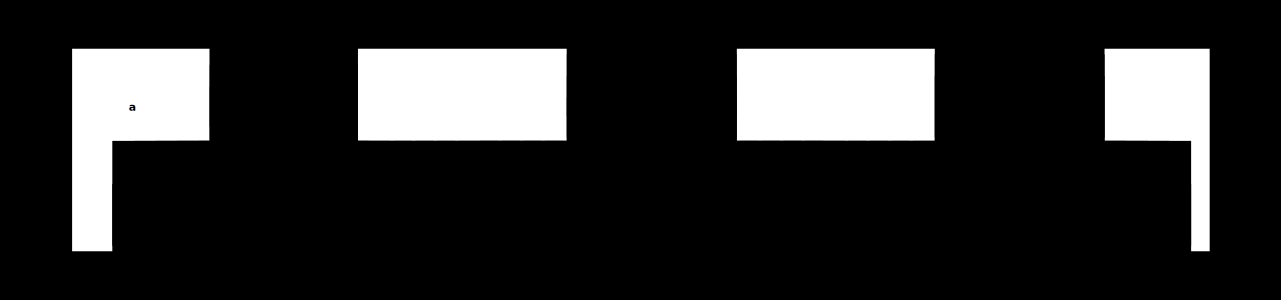

In [36]:
def flatten_spec(a, out):
    k = 0
    for i in range(len(a)):
        for j in range(len(a[0])):
            out[k] = a[i][j]
            k += 1

def flatten(a: TT[["i", "j"]], i:int, j:int) -> TT[["i * j"]]:
    return a[
        floor_div(arange(p := i * j), j),
        mod(arange(p), a.shape[1]),
    ]

test_flatten = make_test("flatten", flatten, flatten_spec, add_sizes=["i", "j"])

In [37]:
run_test(test_flatten)

Correct!


## Puzzle 18 - linspace

Compute [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

/tmp/ipykernel_81307/4145540229.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))


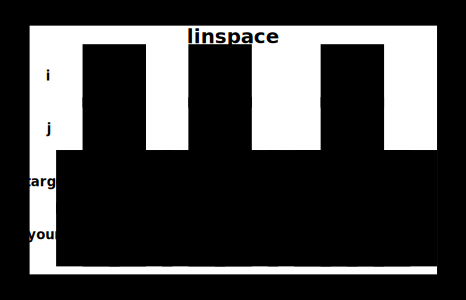

In [38]:
def linspace_spec(i, j, out):
    for k in range(len(out)):
        out[k] = float(i + (j - i) * k / max(1, len(out) - 1))

def linspace(i: TT[[1]], j: TT[[1]], n: int) -> TT[["n"], dtypes.float]:
    return ones(n) * i + (cumsum(ones(n) * 0 + (step := (j - i) / (n - 1))) - step)

test_linspace = make_test("linspace", linspace, linspace_spec, add_sizes=["n"])

In [39]:
run_test(test_linspace)

/tmp/ipykernel_81307/4145540229.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/tmp/ipykernel_81307/4145540229.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/tmp/ipykernel_81307/4145540229.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out[k] = float(i + (j - i) * k / max(1, len(out) - 1))
/tmp/ipykernel_81307/4145540229.py:3: DeprecationWar

AssertionError: Two tensors are not equal
 Spec: 
	<Tensor <LB CLANG (1,) float (<LoadOps.COPY: 3>, <buf real:True device:CLANG size:1 dtype:dtypes.float offset:0>)> on CLANG with grad None> 
	<Tensor <LB CLANG (1,) float (<BinaryOps.ADD: 1>, <buf real:True device:CLANG size:1 dtype:dtypes.float offset:0>)> on CLANG with grad None>

## Puzzle 19 - heaviside

Compute [heaviside](https://numpy.org/doc/stable/reference/generated/numpy.heaviside.html)

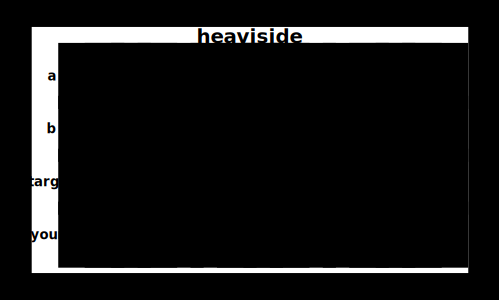

In [40]:
def heaviside_spec(a, b, out):
    for k in range(len(out)):
        if a[k] == 0:
            out[k] = b[k]
        else:
            out[k] = int(a[k] > 0)

def heaviside(a: TT[["i"]], b: TT[["i"]]) -> TT[["i"]]:
    return where(a == 0, b, 1 * (a > 0))

test_heaviside = make_test("heaviside", heaviside, heaviside_spec)

In [41]:
run_test(test_heaviside)

Correct!


## Puzzle 20 - repeat (1d)

Compute [repeat](https://pytorch.org/docs/stable/generated/torch.Tensor.repeat.html)

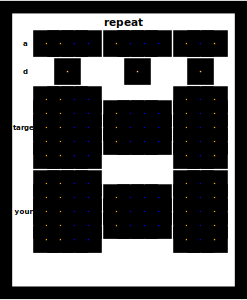

In [42]:
def repeat_spec(a, d, out):
    for i in range(d[0]):
        for k in range(len(a)):
            out[i][k] = a[k]

def constraint_set(d):
    d["d"][0] = d["return"].shape[0]
    return d

            
def repeat(a: TT[["i"]], d: TT[[1]]) -> TT[["d", "i"]]:
    return a * ones(d[0].numpy())[:, None]

test_repeat = make_test("repeat", repeat, repeat_spec, constraint=constraint_set)


# ## Puzzle 21 - bucketize
#
# Compute [bucketize](https://pytorch.org/docs/stable/generated/torch.bucketize.html)

In [43]:
run_test(test_repeat)

Correct!


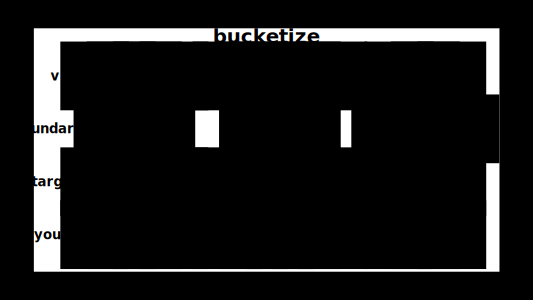

In [44]:
def bucketize_spec(v, boundaries, out):
    for i, val in enumerate(v):
        out[i] = 0
        for j in range(len(boundaries)-1):
            if val >= boundaries[j]:
                out[i] = j + 1
        if val >= boundaries[-1]:
            out[i] = len(boundaries)


def constraint_set(d):
    d["boundaries"] = np.abs(d["boundaries"]).cumsum()
    return d

            
def bucketize(v: TT[["i"]], boundaries: TT[["j"]]) -> TT[["i"]]:
    return (1 * (boundaries <= v[:, None])) @ ones(boundaries.shape[0])

test_bucketize = make_test("bucketize", bucketize, bucketize_spec,
                           constraint=constraint_set)


#
# # Speed Run Mode!
#
# What is the smallest you can make each of these?

In [45]:
run_test(test_bucketize)

Correct!


In [46]:
import inspect
fns = (ones, sum, outer, diag, eye, triu, cumsum, diff, vstack, roll, flip,
       compress, pad_to, sequence_mask, bincount, scatter_add)

for fn in fns:
    lines = [l for l in inspect.getsource(fn).split("\n") if not l.strip().startswith("#")]
    
    if len(lines) > 3:
        print(fn.__name__, len(lines[2]), "(more than 1 line)")
    else:
        print(fn.__name__, len(lines[1]))

ones 38
sum 40
outer 34
diag 34 (more than 1 line)
eye 48
triu 48
cumsum 54 (more than 1 line)
diff 64
vstack 47
roll 37
flip 31
compress 62
pad_to 59
sequence_mask 63
bincount 61
scatter_add 54
